In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 195MB/s]
100% 1.06G/1.06G [00:05<00:00, 197MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
#Generator

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#Normalize (0-1) Range
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# Create CNN Model

model = Sequential()

model .add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model .add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model .add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model .add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model .add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model .add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model .add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.5702 - loss: 0.7257 - val_accuracy: 0.7272 - val_loss: 0.5503
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.7333 - loss: 0.5387 - val_accuracy: 0.7710 - val_loss: 0.4780
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7873 - loss: 0.4503 - val_accuracy: 0.7840 - val_loss: 0.4536
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8429 - loss: 0.3526 - val_accuracy: 0.7822 - val_loss: 0.5036
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.8988 - loss: 0.2400 - val_accuracy: 0.7722 - val_loss: 0.7145
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9434 - loss: 0.1477 - val_accuracy: 0.7674 - val_loss: 0.7874
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.9653 - loss: 0.0977 - val_accuracy: 0.7762 - val_loss: 0.9580
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.9781 - loss: 0.0666 - 

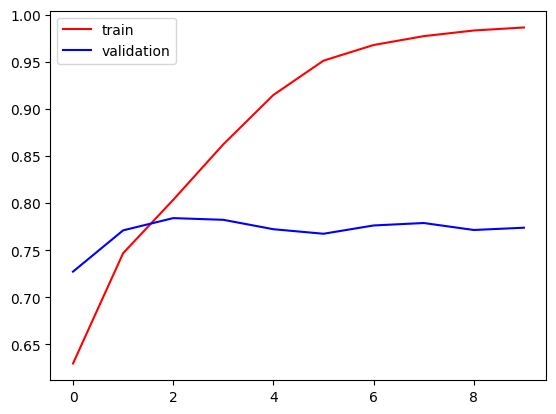

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

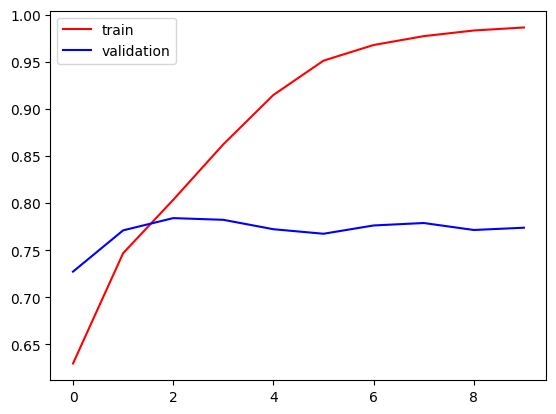

In [17]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [47]:
test_img = cv2.imread('/content/dog.jpg')

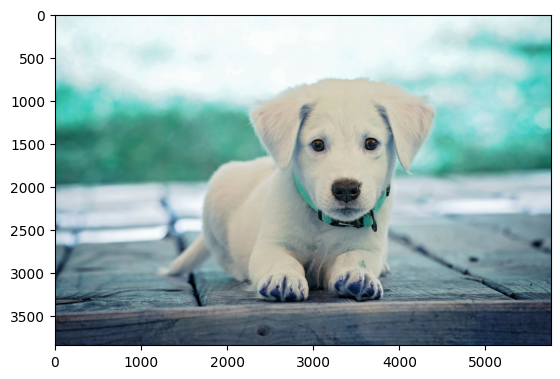

In [48]:
plt.imshow(test_img)

In [49]:
test_img.shape

(3840, 5760, 3)

In [50]:
test_img = cv2.resize(test_img, (256,256))

In [51]:
test_input = test_img.reshape((1,256,256,3))

In [52]:
#array[[0.]] - Dog
#array[[1.]] - Cat

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

In [53]:
test_img = cv2.imread('/content/cat.jpg')

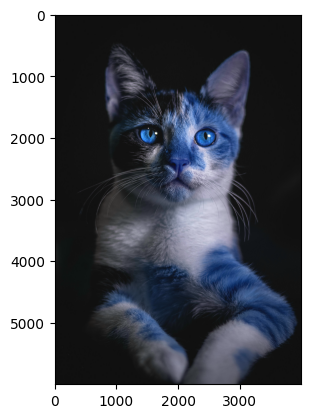

In [54]:
plt.imshow(test_img)

In [55]:
test_img.shape

(6000, 4000, 3)

In [56]:
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1,256,256,3))

In [57]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[1.]], dtype=float32)